In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('coordinate_nitc.csv')

# Randomly select 23 rows
random_rows = df.sample(n=23)

# Display the selected rows
print(random_rows)
random_rows.to_csv('coordinate.csv', index=False)



                Column1  Column2  Column3
23     NITC GUEST HOUSE  11.3180  75.9334
29                 MBH1  11.3180  75.9334
8              E HOSTEL  11.3197  75.9385
27     FACULTY QUARTERS  11.3158  75.9362
6              C HOSTEL  11.3204  75.9368
18  UESI STAFF QUARTERS  11.3179  75.9276
0             Main Gate  11.3198  75.9328
7              D HOSTEL  11.3202  75.9376
21                  MLH  11.3164  75.9304
17             SBI NITC  11.3197  75.9299
9              F HOSTEL  11.3209  75.9376
26                 SOMS  11.3139  75.9320
3                    DB  11.3220  75.9349
5              B HOSTEL  11.3206  75.9359
19                NIELT  11.3145  75.9267
2                  ELHC  11.3224  75.9338
12          EAST CAMPUS  11.3229  75.9376
1                  NLHC  11.3215  75.9332
15     REGIONAL POULTRY  11.3219  75.9307
10             G HOSTEL  11.3214  75.9367
24        NITC QUARTERS  11.3168  75.9319
11           AUDITORIUM  11.3227  75.9359
25           MBA HOSTEL  11.3149  

In [72]:
import pandas as pd

def convert_coordinates_from_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, header=None,skiprows=1)

    # Convert the DataFrame to a list of tuples
    coordinates = list(df.itertuples(index=False, name=None))

    result = []
    for coord in coordinates:
        result.append({"latitude": coord[1], "longitude": coord[2]})
    return result

# Example usage:
file_path = 'coordinate.csv'  # replace with your actual file path
cord = convert_coordinates_from_csv(file_path)
cord
print(cord)


[{'latitude': 11.317961, 'longitude': 75.933384}, {'latitude': 11.317961, 'longitude': 75.933384}, {'latitude': 11.319707, 'longitude': 75.938474}, {'latitude': 11.315818, 'longitude': 75.936233}, {'latitude': 11.320384, 'longitude': 75.936791}, {'latitude': 11.317912, 'longitude': 75.927575}, {'latitude': 11.31982, 'longitude': 75.932818}, {'latitude': 11.320177, 'longitude': 75.937621}, {'latitude': 11.316408, 'longitude': 75.930353}, {'latitude': 11.319673, 'longitude': 75.929881}, {'latitude': 11.320914, 'longitude': 75.937614}, {'latitude': 11.313905, 'longitude': 75.932048}, {'latitude': 11.321999, 'longitude': 75.93491}, {'latitude': 11.320595, 'longitude': 75.9359}, {'latitude': 11.314542, 'longitude': 75.926701}, {'latitude': 11.322396, 'longitude': 75.933841}, {'latitude': 11.32293, 'longitude': 75.937577}, {'latitude': 11.321539, 'longitude': 75.933159}, {'latitude': 11.321922, 'longitude': 75.930655}, {'latitude': 11.321387, 'longitude': 75.936741}, {'latitude': 11.316839, 

In [73]:
import requests
import json

# Define the API endpoint
url = "https://dev.virtualearth.net/REST/v1/Routes/DistanceMatrix"

# Define the headers for the API request
headers = {
    'Content-Type': 'application/json',
}

# Define the parameters for the API request
params = (
    ('key', 'Athz-Voune0cVNFWTtgZ2hNoH9m1D9yf2bBhw_6V9CzngRTcCBGEM7D_P7-rkFAW'),  # replace with your Bing Maps API key
)

# Define the body of the API request
data = {
  "origins": cord,
  "destination": cord,
  "travelMode": "driving"
}


# Make the API request
response = requests.post(url, headers=headers, params=params, data=json.dumps(data))
# Get the JSON response content
response_json = response.json()

import numpy as np
import pandas as pd

# Extract the 'results' list from the response
resourceSets = response_json.get('resourceSets', [])
if resourceSets:
    resources = resourceSets[0].get('resources', [])
    if resources:
        results = resources[0].get('results', [])
    else:
        print("No resources found")
else:
    print("No resourceSets found")
print(response.status_code)
print(response_json)

# Prepare an empty matrix
matrix = np.empty((len(data['origins']), len(data['destination'])))

# Fill the matrix with the results
for result in results:
    origin_index = result['originIndex']
    destination_index = result['destinationIndex']
    travel_distance = result['travelDistance']
    matrix[origin_index][destination_index] = travel_distance

# Convert the matrix to a DataFrame for better visualization
df = pd.DataFrame(matrix)
# Set the float format for pandas DataFrame
pd.options.display.float_format = "{:,.4f}".format

# Add headers (location numbers) to the DataFrame
df.columns = [f"Location {i+1}" for i in range(len(data['destination']))]
df.index = [f"Location {i+1}" for i in range(len(data['origins']))]

# Save the DataFrame to a CSV file
df.to_csv('distance_matrix_nitc_full.csv')

print(df)

200
{'authenticationResultCode': 'ValidCredentials', 'brandLogoUri': 'https://dev.virtualearth.net/Branding/logo_powered_by.png', 'copyright': 'Copyright © 2024 Microsoft and its suppliers. All rights reserved. This API cannot be accessed and the content and any results may not be used, reproduced or transmitted in any manner without express written permission from Microsoft Corporation.', 'resourceSets': [{'estimatedTotal': 1, 'resources': [{'__type': 'DistanceMatrix:http://schemas.microsoft.com/search/local/ws/rest/v1', 'destinations': [{'latitude': 11.317961, 'longitude': 75.933384}, {'latitude': 11.317961, 'longitude': 75.933384}, {'latitude': 11.319707, 'longitude': 75.938474}, {'latitude': 11.315818, 'longitude': 75.936233}, {'latitude': 11.320384, 'longitude': 75.936791}, {'latitude': 11.317912, 'longitude': 75.927575}, {'latitude': 11.31982, 'longitude': 75.932818}, {'latitude': 11.320177, 'longitude': 75.937621}, {'latitude': 11.316408, 'longitude': 75.930353}, {'latitude': 11

[[11.317961 75.933384]
 [11.317961 75.933384]
 [11.319707 75.938474]
 [11.315818 75.936233]
 [11.320384 75.936791]
 [11.317912 75.927575]
 [11.31982  75.932818]
 [11.320177 75.937621]
 [11.316408 75.930353]
 [11.319673 75.929881]
 [11.320914 75.937614]
 [11.313905 75.932048]
 [11.321999 75.93491 ]
 [11.320595 75.9359  ]
 [11.314542 75.926701]
 [11.322396 75.933841]
 [11.32293  75.937577]
 [11.321539 75.933159]
 [11.321922 75.930655]
 [11.321387 75.936741]
 [11.316839 75.931929]
 [11.322719 75.935858]
 [11.314874 75.932665]]
Centroid Distance Matrix saved to centroid_distance_matrix_nitc.csv
Point-to-Centroid Distance Matrix saved to point_to_centroid_distance_matrix_nitc.csv
[11.317961 75.933384]
[11.317961 75.933384]
[11.315818 75.936233]
[11.31982  75.932818]
[11.321999 75.93491 ]
[11.322396 75.933841]
[11.321539 75.933159]
[11.321922 75.930655]
[11.319707 75.938474]
[11.320384 75.936791]
[11.320177 75.937621]
[11.320914 75.937614]
[11.320595 75.9359  ]
[11.32293  75.937577]
[11.3213

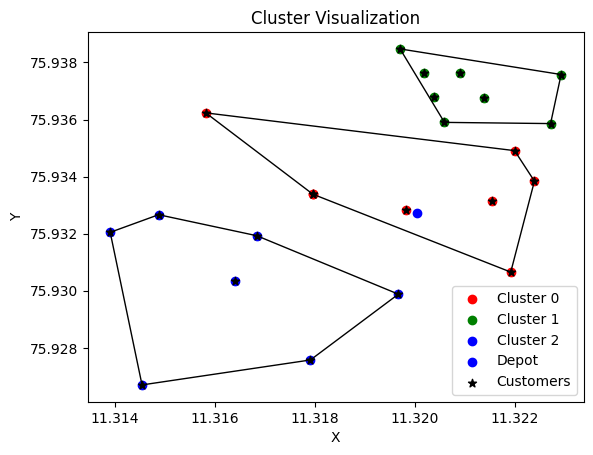

Distance Matrix between Cluster Centroids:
[[0.         0.00371461 0.00495458]
 [0.00371461 0.         0.00840806]
 [0.00495458 0.00840806 0.        ]]
Distance Matrix between Points and Cluster Centroids:
[[0.00197283 0.00484406 0.00361919]
 [0.00197283 0.00484406 0.00361919]
 [0.00493091 0.00197752 0.0089779 ]
 [0.00490847 0.00534982 0.00608814]
 [0.00327504 0.00077068 0.0077799 ]
 [0.00630373 0.01001832 0.00304632]
 [0.0007378  0.00444287 0.00440203]
 [0.00408067 0.00107533 0.00840064]
 [0.00475304 0.00819604 0.00021352]
 [0.00367579 0.00733154 0.00337735]
 [0.00418408 0.00057356 0.00875861]
 [0.006206   0.00877679 0.00305281]
 [0.00247956 0.00234084 0.00741023]
 [0.00244502 0.00127681 0.00716081]
 [0.00871089 0.01227136 0.00388762]
 [0.00248632 0.00348063 0.00711232]
 [0.00502502 0.00189683 0.00993985]
 [0.00165827 0.00393737 0.00602781]
 [0.00351418 0.00646923 0.00563581]
 [0.00351096 0.00043704 0.00830963]
 [0.00348668 0.00667985 0.00184272]
 [0.00362372 0.0020223  0.00857447]
 [

In [97]:
# real model of nitc
#real working code
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from scipy.spatial.distance import cdist
from k_means_constrained import KMeansConstrained
import csv
from geopy.distance import geodesic

# Function to calculate haversine distance between two points
def haversine(coord1, coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    return geodesic((lat1, lon1), (lat2, lon2)).kilometers

def plot_clusters(depot_location, customer_locations, cluster_assignments):
    # Define a list of colors for each cluster
    cluster_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    
    for cluster_id in np.unique(cluster_assignments):
        # Get points belonging to the current cluster
        cluster_points = customer_locations[cluster_assignments == cluster_id]
        
        # Plot cluster points with a different color
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', color=cluster_colors[cluster_id % len(cluster_colors)])
        
        # Check if there are at least three points in the cluster to compute convex hull
        if len(cluster_points) >= 3:
            # Draw convex hull around the cluster points
            hull = ConvexHull(cluster_points)
            for simplex in hull.simplices:
                plt.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], color='black', linewidth=1)
    
    # Additional visualization code for depot and customer locations
    plt.scatter(depot_location[0], depot_location[1], label='Depot', marker='o', color='blue')
    plt.scatter(customer_locations[:, 0], customer_locations[:, 1], label='Customers', marker='*', color='black')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Cluster Visualization')
    plt.legend()
    plt.grid(False)  # Removing grid lines
    plt.show()
    
import requests

# Function to check if a point is reachable by driving using Bing Maps API
def is_point_reachable_by_car(point):
    print(point)
    # Use Bing Maps API to check if the point is reachable by driving
    # Replace 'YOUR_BING_MAPS_API_KEY' with your actual API key
    API_KEY = 'Athz-Voune0cVNFWTtgZ2hNoH9m1D9yf2bBhw_6V9CzngRTcCBGEM7D_P7-rkFAW'
    depot_lat, depot_lon = 11.320047447954922, 75.93272836230899  # Depot location
    endpoint = f'http://dev.virtualearth.net/REST/v1/Routes/Driving?wp.0={depot_lat},{depot_lon}&wp.1={point[0]},{point[1]}&key={API_KEY}'
    response = requests.get(endpoint)
    data = response.json()
    
    # Check if a route is returned
    if 'resourceSets' in data and len(data['resourceSets']) > 0 and 'resources' in data['resourceSets'][0] and len(data['resourceSets'][0]['resources']) > 0:
        return True
    else:
        return False

def update_centroid_distance_matrix(cluster_points_dict, centroid_distance_matrix, cluster_centroids):
    for cluster_num, cluster_data in cluster_points_dict.items():
        for i, point in enumerate(cluster_data):
            # Check if the point is reachable by car
            if not is_point_reachable_by_car(point):
                # Find the nearest drivable point within the cluster
                distances = np.linalg.norm(cluster_data - point, axis=1)
                min_distance_index = np.argmin(distances)
                min_distance_point = cluster_data[min_distance_index]
                
                # Update centroid distance matrix with the distance to the nearest drivable point
                centroid_distance_matrix[cluster_num, i] = np.linalg.norm(min_distance_point - cluster_centroids[cluster_num])



# K-Means Clustering Function using KMeansConstrained
def kmeans_constrained_clustering(depot_location, customer_locations, drone_ranges, max_drones):
    # Combine depot location and customer locations
    all_locations = np.concatenate(([depot_location], customer_locations), axis=0)
    cluster_number = int((len(customer_locations) + 8) / max_drones)

    # Initialize k-means with n cluster
    max_clusters = min(len(customer_locations), max_drones)
    kmeans = KMeansConstrained(n_clusters=cluster_number, size_max=max_drones, random_state=0).fit(customer_locations)

    # Select a customer location as the focal point for each cluster
    cluster_assignments = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

     # Enforce size constraint
    while not np.all(np.bincount(kmeans.labels_) <= max_drones):
        # Identify points belonging to clusters exceeding size_max
        exceeding_clusters = np.where(np.bincount(kmeans.labels_) > max_drones)[0]

        # Remove points from exceeding clusters
        for cluster in exceeding_clusters:
            cluster_points = np.where(kmeans.labels_ == cluster)[0]
            customer_locations = np.delete(customer_locations, cluster_points, axis=0)

        # Refit KMeans
        kmeans = KMeansConstrained(n_clusters=1, size_max=max_drones, random_state=0).fit(customer_locations)

    # Get cluster assignments for each location
    cluster_assignments = kmeans.predict(customer_locations)

    # Get cluster centroids
    cluster_centroids = kmeans.cluster_centers_

    # Create distance matrix between cluster centroids
    centroid_distance_matrix = pairwise_distances(cluster_centroids, cluster_centroids, metric='euclidean')

    # Create distance matrix between each point and its cluster centroid
    point_to_centroid_distance_matrix = pairwise_distances(customer_locations, cluster_centroids, metric='euclidean')

    # Create DataFrames for better control over precision
    centroid_distance_df = pd.DataFrame(centroid_distance_matrix)
    point_to_centroid_distance_df = pd.DataFrame(point_to_centroid_distance_matrix)

    # Set precision to two decimal places
    precision = 6
    centroid_distance_df = centroid_distance_df.round(precision)
    point_to_centroid_distance_df = point_to_centroid_distance_df.round(precision)

    # Save distance matrices to CSV files
    centroid_distance_matrix_csv_file_path = "centroid_distance_matrix_nitc.csv"
    point_to_centroid_distance_matrix_csv_file_path = "point_to_centroid_distance_matrix_nitc.csv"

    centroid_distance_df.to_csv(centroid_distance_matrix_csv_file_path, index=False, header=True)
    point_to_centroid_distance_df.to_csv(point_to_centroid_distance_matrix_csv_file_path, index=False, header=True)

    print(f"Centroid Distance Matrix saved to {centroid_distance_matrix_csv_file_path}")
    print(f"Point-to-Centroid Distance Matrix saved to {point_to_centroid_distance_matrix_csv_file_path}")

    # Create cluster_points_dict with correct structure
    cluster_points_dict = {}
    for cluster_num in np.unique(cluster_assignments):
        cluster_points = customer_locations[cluster_assignments == cluster_num]
        cluster_points_dict[cluster_num] = cluster_points
        
    update_centroid_distance_matrix(cluster_points_dict, centroid_distance_matrix, cluster_centroids)
    point_to_centroid_distance_1_df = point_to_centroid_distance_df.round(precision)
    point_to_centroid_distance_matrix_csv_file_path = "point_to_centroid_distance_1_matrix.csv"

    return cluster_assignments, cluster_centroids, centroid_distance_matrix, point_to_centroid_distance_matrix, cluster_points_dict

# Generate 100 random customer locations
num_customers = 25
#Given customer locations
depot_location = np.array([11.320047447954922, 75.93272836230899])  # Replace with actual depot coordinates
def convert_coordinates_from_m_csv(file_path):
    # Read the entire CSV file
    df = pd.read_csv(file_path)

    # Select only the 'Column2' and 'Column3' columns
    df = df[['Column2', 'Column3']]

    # Convert the DataFrame to a numpy array
    coordinates = df.to_numpy()

    return coordinates
# Example usage:
file_path = 'coordinate.csv'  # replace with your actual file path
customer_locations = convert_coordinates_from_m_csv(file_path)
print(customer_locations)
# Generate random drone ranges for each customer
drone_range = 25

# Maximum number of drones carried by the truck
max_drones = 8

# Run the clustering algorithm
cluster_assignments, cluster_centroids, centroid_distance_matrix, point_to_centroid_distance_matrix, cluster_points_dict = kmeans_constrained_clustering(depot_location, customer_locations, drone_range, max_drones)


# Visualize the clusters
plot_clusters(depot_location, customer_locations, cluster_assignments)

# Print distance matrix between cluster centroids
print("Distance Matrix between Cluster Centroids:")
print(centroid_distance_matrix)

# Print distance matrix between each point and its cluster centroid
print("Distance Matrix between Points and Cluster Centroids:")
print(point_to_centroid_distance_matrix)

# Print cluster points for each cluster along with distances from the centroid
for cluster_num, cluster_points in cluster_points_dict.items():
    cluster_centroid = cluster_centroids[cluster_num]
    
    # Calculate distances for each point in the cluster from its centroid
    distances_from_centroid = np.linalg.norm(cluster_points - cluster_centroid, axis=1)
    
    # Create a list of tuples containing the point coordinates and its distance from the centroid
    point_distance_list = list(zip(cluster_points, distances_from_centroid))
    
    print(f"Cluster {cluster_num + 1} Points and Distances from Centroid:")
    for point, distance in point_distance_list:
        print(f"Point: {point}, Distance: {distance}")

    # Optionally, if you want to store these distances for later use
    cluster_points_dict[cluster_num] = {'points': cluster_points, 'distances': distances_from_centroid}
    
# Create and save a CSV file with distances for each point in a cluster
csv_file_path = "cluster_distances_nitc.csv"

with open(csv_file_path, mode='w', newline='') as csv_file:
    fieldnames = ['ClusterNumber', 'PointX', 'PointY', 'DistanceFromCentroid']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    # Write header to the CSV file
    writer.writeheader()
    
    # Write data to the CSV file
    for cluster_num, cluster_data in cluster_points_dict.items():
        cluster_points = cluster_data['points']
        cluster_centroid = cluster_centroids[cluster_num]
        
        
        # Calculate distances for each point in the cluster from its centroid in kilometers
        distances_from_centroid = [haversine(point, cluster_centroid) for point in cluster_points]
        
        # Write each point along with its distance and cluster number to the CSV file
        for point, distance in zip(cluster_points, distances_from_centroid):
            writer.writerow({'ClusterNumber': cluster_num + 1, 'PointX': point[0], 'PointY': point[1], 'DistanceFromCentroid': distance})

print(f"Cluster distances saved to {csv_file_path}")
# Define the file path for saving the centroid coordinates
centroid_coordinates_csv_file_path = "centroid_coordinates_nitc.csv"
# Write centroid coordinates to the CSV file
def write_centroid_coordinates_to_csv(centroid_coordinates_csv_file_path, new_centroid_coordinates):
    with open(centroid_coordinates_csv_file_path, mode='w', newline='') as csv_file:
        fieldnames = ['ClusterNumber', 'NewCentroidX', 'NewCentroidY']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()

        # Write new centroid coordinates to the CSV file
        for cluster_num, new_centroid in enumerate(new_centroid_coordinates):
            writer.writerow({'ClusterNumber': cluster_num + 1,
                             'NewCentroidX': new_centroid[0],
                             'NewCentroidY': new_centroid[1]})

# Save centroid coordinates to CSV with new coordinates
new_centroid_coordinates = cluster_centroids
write_centroid_coordinates_to_csv("centroid_coordinates_nitc.csv", new_centroid_coordinates)

print(f"Centroid coordinates saved to centroid_coordinates.csv")





In [98]:
import pandas as pd

def convert_coordinates_from_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path, header=None,skiprows=1)

    # Convert the DataFrame to a list of tuples
    coordinates = list(df.itertuples(index=False, name=None))

    result = []
    for coord in coordinates:
        result.append({"latitude": coord[1], "longitude": coord[2]})
    return result

# Example usage:
file_path = 'centroid_coordinates_nitc.csv'  # replace with your actual file path
cord = convert_coordinates_from_csv(file_path)
cord
print(cord)

[{'latitude': 11.319927, 'longitude': 75.933548}, {'latitude': 11.321101625, 'longitude': 75.937072}, {'latitude': 11.31630757142857, 'longitude': 75.93016457142856}]


In [99]:
import requests
import json

# Define the API endpoint
url = "https://dev.virtualearth.net/REST/v1/Routes/DistanceMatrix"

# Define the headers for the API request
headers = {
    'Content-Type': 'application/json',
}

# Define the parameters for the API request
params = (
    ('key', 'Athz-Voune0cVNFWTtgZ2hNoH9m1D9yf2bBhw_6V9CzngRTcCBGEM7D_P7-rkFAW'),  # replace with your Bing Maps API key
)

# Define the body of the API request
data = {
  "origins": cord,
  "destination": cord,
  "travelMode": "driving"
}


# Make the API request
response = requests.post(url, headers=headers, params=params, data=json.dumps(data))
# Get the JSON response content
response_json = response.json()

import numpy as np
import pandas as pd

# Extract the 'results' list from the response
resourceSets = response_json.get('resourceSets', [])
if resourceSets:
    resources = resourceSets[0].get('resources', [])
    if resources:
        results = resources[0].get('results', [])
    else:
        print("No resources found")
else:
    print("No resourceSets found")
print(response.status_code)
print(response_json)

# Prepare an empty matrix
matrix = np.empty((len(data['origins']), len(data['destination'])))

# Fill the matrix with the results
for result in results:
    origin_index = result['originIndex']
    destination_index = result['destinationIndex']
    travel_distance = result['travelDistance']
    matrix[origin_index][destination_index] = travel_distance

# Convert the matrix to a DataFrame for better visualization
df = pd.DataFrame(matrix)
# Set the float format for pandas DataFrame
pd.options.display.float_format = "{:,.4f}".format

# Add headers (location numbers) to the DataFrame
df.columns = [f"Location {i+1}" for i in range(len(data['destination']))]
df.index = [f"Location {i+1}" for i in range(len(data['origins']))]

# Save the DataFrame to a CSV file
df.to_csv('distance_matrix_nitc.csv')

print(df)

200
{'authenticationResultCode': 'ValidCredentials', 'brandLogoUri': 'https://dev.virtualearth.net/Branding/logo_powered_by.png', 'copyright': 'Copyright © 2024 Microsoft and its suppliers. All rights reserved. This API cannot be accessed and the content and any results may not be used, reproduced or transmitted in any manner without express written permission from Microsoft Corporation.', 'resourceSets': [{'estimatedTotal': 1, 'resources': [{'__type': 'DistanceMatrix:http://schemas.microsoft.com/search/local/ws/rest/v1', 'destinations': [{'latitude': 11.319927, 'longitude': 75.933548}, {'latitude': 11.321101625, 'longitude': 75.937072}, {'latitude': 11.31630757142857, 'longitude': 75.93016457142856}], 'origins': [{'latitude': 11.319927, 'longitude': 75.933548}, {'latitude': 11.321101625, 'longitude': 75.937072}, {'latitude': 11.31630757142857, 'longitude': 75.93016457142856}], 'results': [{'destinationIndex': 1, 'originIndex': 0, 'totalWalkDuration': 0, 'travelDistance': 0.614, 'trave

In [50]:
!pip install shapely


In [52]:
!pip install geopandas

  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


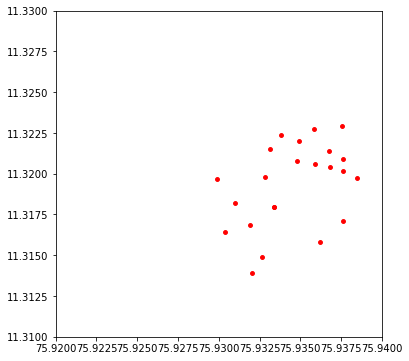

In [57]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

# Load the data from your CSV file
df = pd.read_csv("coordinate.csv", header=None)  # replace with your csv file

# Assign column names
df.columns = ['Location', 'Latitude', 'Longitude']

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)

# Plot the data on a map
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x and y limits of your plot (replace with your desired coordinates)
ax.set_xlim([75.92, 75.94])
ax.set_ylim([11.31, 11.33])

# Plot the data
gdf.plot(ax=ax, marker='o', color='red', markersize=15)
plt.show()


In [58]:
!pip install folium

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires Jinja2<3.0,>=2.3, but you have jinja2 3.1.3 which is incompatible.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.1.5 which is incompatible.


In [174]:
import pandas as pd
import folium

# Load the data from your CSV file
df = pd.read_csv("coordinate.csv", header=None,skiprows=1)  # replace with your csv file

# Assign column names
df.columns = ['Location', 'Latitude', 'Longitude']

# Create a map centered around your points
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=14)

# Add points to the map
for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Location']).add_to(m)

# Display the map
m


In [176]:
import pandas as pd
import folium

# Load the data from your first CSV file
df1 = pd.read_csv("coordinate.csv", header=None,skiprows=1)  # replace with your csv file
df1.columns = ['Location', 'Latitude', 'Longitude']

# Load the data from your second CSV file
df2 = pd.read_csv("centroid_coordinates_nitc.csv")  # replace with your second csv file
df2.columns = ['ClusterNumber', 'NewCentroidX', 'NewCentroidY']

# Create a map centered around your points
m = folium.Map(location=[df1['Latitude'].mean(), df1['Longitude'].mean()], zoom_start=14)

# Add points from the first DataFrame to the map
for _, row in df1.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Location'], icon=folium.Icon(color="red")).add_to(m)

# Add points from the second DataFrame to the map
for _, row in df2.iterrows():
    folium.Marker([row['NewCentroidX'], row['NewCentroidY']], popup=row['ClusterNumber'], icon=folium.Icon(color="blue")).add_to(m)

# Display the map
m
